# Import Python and show version used

In [33]:
import sys
print ('Python Version')
print (sys.version)

Python Version
3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


# Import packages used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import cluster
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale


# Load UFC dataset and replace values

In [35]:
ufcrawdata = pd.read_csv('UFC_data.csv')
ufcrawdata.dropna(inplace=True)

In [36]:
ufcrawdata.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


# Show shape of data set

In [37]:
ufcrawdata.shape

(3202, 145)

# Adjust dataset to contain needed columns and drop rest

In [38]:
colum_list = ['R_fighter', 'B_fighter', 'Winner','weight_class','R_age', 'B_age']

In [39]:
ufcdata = ufcrawdata[colum_list]
ufcdata.dropna(inplace=True)

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
ufcdata.head()

,R_fighter,B_fighter,Winner,weight_class,R_age,B_age
0,Henry Cejudo,Marlon Moraes,Red,Bantamweight,32.0,31.0
1,Valentina Shevchenko,Jessica Eye,Red,Women's Flyweight,31.0,32.0
2,Tony Ferguson,Donald Cerrone,Red,Lightweight,35.0,36.0
3,Jimmie Rivera,Petr Yan,Blue,Bantamweight,29.0,26.0
4,Tai Tuivasa,Blagoy Ivanov,Blue,Heavyweight,26.0,32.0


# Visualize disparity of win rate based on corner color

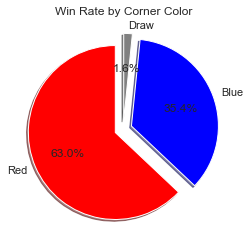

In [41]:
labels = 'Red', 'Blue', 'Draw'
sizes = [2016, 1135, 51]
explode = (0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors = ['red', 'blue', 'grey'])
plt.title('Win Rate by Corner Color')
plt.show()

## Show wins per type

In [42]:
ufcdata.Winner.value_counts()

Red     2016
Blue    1135
Draw      51
Name: Winner, dtype: int64

## Present age statistics

In [43]:
ufcdata.R_age.describe()

count    3202.000000
mean       30.093067
std         4.138657
min        19.000000
25%        27.000000
50%        30.000000
75%        33.000000
max        46.000000
Name: R_age, dtype: float64

In [44]:
ufcdata.B_age.describe()

count    3202.000000
mean       29.720800
std         4.022756
min        20.000000
25%        27.000000
50%        29.000000
75%        32.000000
max        47.000000
Name: B_age, dtype: float64

# Visualisze color corner ages to compare

Text(0, 0.5, 'Density of Fighter Ages')

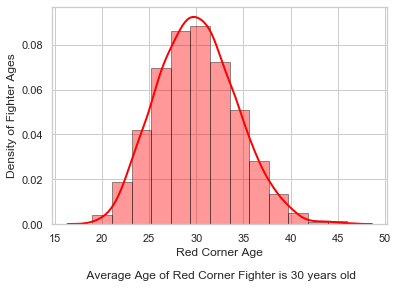

In [45]:
ax = sns.distplot(ufcdata['R_age'], hist=True, kde=True, 
             bins=int(65/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set_xlabel('Red Corner Age\n\n Average Age of Red Corner Fighter is 30 years old')
ax.set_ylabel('Density of Fighter Ages')

In [46]:
ufcdata.loc[:,"R_age"].mean()

30.093066833229233

Text(0, 0.5, 'Density of Fighter Ages')

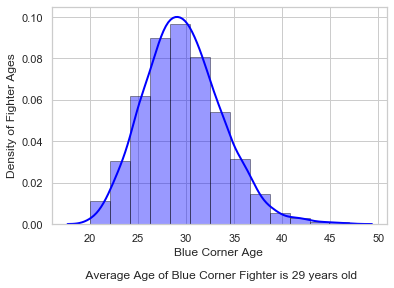

In [47]:
ax = sns.distplot(ufcdata['B_age'], hist= True, kde=True, 
             bins=int(65/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set_xlabel('Blue Corner Age \n\n Average Age of Blue Corner Fighter is 29 years old')
ax.set_ylabel('Density of Fighter Ages')

In [48]:
ufcdata.loc[:,"B_age"].mean()

29.720799500312303

# Show  weight classes in relation to winner

In [49]:
win_weightclass = ufcrawdata.groupby(['weight_class']).Winner
win_weightclass.value_counts()

weight_class           Winner
Bantamweight           Red       139
                       Blue       99
                       Draw        5
Catch Weight           Red         6
                       Blue        3
Featherweight          Red       176
                       Blue      118
                       Draw        5
Flyweight              Red        87
                       Blue       50
                       Draw        1
Heavyweight            Red       167
                       Blue       92
                       Draw        5
Light Heavyweight      Red       233
                       Blue      102
                       Draw        5
Lightweight            Red       412
                       Blue      218
                       Draw       14
Middleweight           Red       311
                       Blue      157
                       Draw        6
Welterweight           Red       396
                       Blue      231
                       Draw        9
Women's 

## Plot bar chart representing number of wins to weight class

Text(0.5, 0, 'UFC Weight Class')

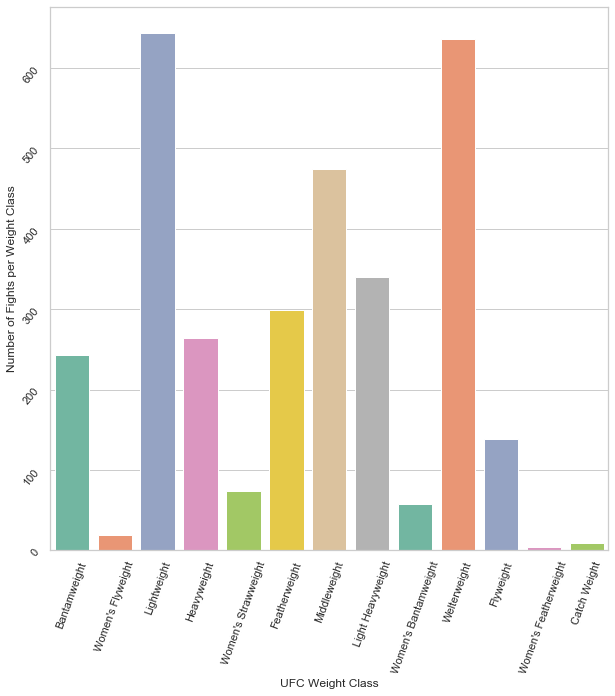

In [50]:
plt.figure(figsize=(10,10))
plt.yticks(rotation= 50)
plt.xticks(rotation=70)
sns.set(style= 'whitegrid')
ax = sns.countplot(x = 'weight_class', data = ufcdata, palette="Set2")
ax.set_ylabel('Number of Fights per Weight Class')
ax.set_xlabel('UFC Weight Class')

## Present stacked bar chart to show color corner victories in relation to each weight class

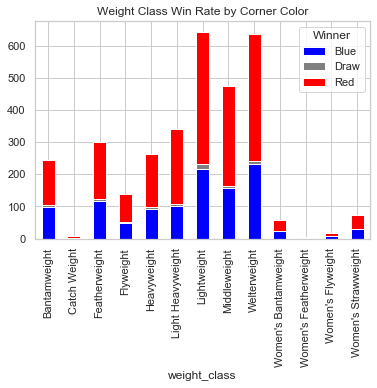

In [51]:
ufcdata.groupby(['weight_class','Winner']).size().unstack().plot(kind='bar',stacked=True, color = ('blue','grey','red'))
plt.title('Weight Class Win Rate by Corner Color')
plt.show()

# Unsupervised method of color corner age relation winner

## Relationship of red age and winner

In [52]:
Rolum = ['Winner','R_age']
Rage = ufcdata[Rolum]
Rage.head()

,Winner,R_age
0,Red,32.0
1,Red,31.0
2,Red,35.0
3,Blue,29.0
4,Blue,26.0


In [103]:
Rage.shape

(3202, 2)

## Transform variable values and scale to KMeans needs

In [104]:
transformed_x = OrdinalEncoder().fit_transform(Rage)
Y2 = Rage['R_age']
transformed_y = LabelEncoder().fit_transform(Y2)

In [127]:
scaled_data = scale(transformed_x)

## Run Kmeans analysis

In [106]:
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(transformed_y))
Y2 = LabelEncoder().fit_transform(transformed_y)
for k in range(2, 51):
 kmeans = cluster.KMeans(n_clusters=k)
 kmeans.fit(scaled_data)
 print(k)
 print(metrics.homogeneity_score(Y2, kmeans.labels_))
 print(metrics.completeness_score(Y2, kmeans.labels_))

2
0.006092412596155876
0.026330328123112492
3
0.16316045731963402
0.4205069857537184
4
0.24655898514819893
0.5211801564625425
5
0.33280032753960037
0.5953581312781001
6
0.3829573185551156
0.6286116676884268
7
0.4408273281199129
0.6606799141069295
8
0.47394093920802305
0.677215539841743
9
0.4900224383863897
0.6842270682787152
10
0.5572798581217505
0.7108340491456886
11
0.5775833928925774
0.7177263708045106
12
0.5754715512726484
0.7040163916545747
13
0.5918305223547192
0.7083044105127946
14
0.6247208993828128
0.7194129477300077
15
0.6351180676254149
0.7239136433952233
16
0.6554694871016906
0.7292236608473146
17
0.6772703267067125
0.730643108040235
18
0.6924258558023627
0.7364186491096234
19
0.7159655489738116
0.7428857242400259
20
0.7493335237124154
0.750903704782603
21
0.7390374458079908
0.748115767604273
22
0.7465175203336774
0.7501731656477717
23
0.7906081953711238
0.7607974017513711
24
0.7702859814313742
0.7552070569217202
25
0.813415191150129
0.7651381713023359
26
0.812909061209742


## Display Relation of Age to Fighter Wins

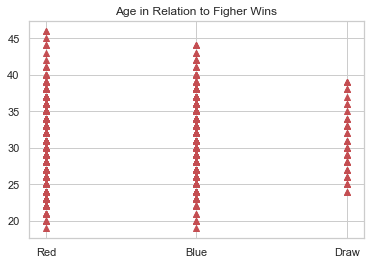

In [123]:
fig, ax = plt.subplots()
ax.scatter(Rage["Winner"], Rage["R_age"], color='r', marker='^')
plt.title('Age in Relation to Figher Wins')
plt.show()

# Supervised method of fighter weightclass to winner (Logistic Regression)

In [129]:
def tran_Winner(x):
    if x == 'Red':
        return 1
    if x == 'Blue':
        return 0
ufcdata['T_Winner'] = ufcdata['Winner'].apply(tran_Winner)
ufcdata.dropna(inplace=True)

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Will\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [130]:
x=ufcdata[['weight_class']]
y=ufcdata['T_Winner']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [131]:
transformed_x_train=OrdinalEncoder().fit_transform(X_train)
transformed_x_test=OrdinalEncoder().fit_transform(X_test)

In [132]:
lm = LogisticRegression()
lm.fit(transformed_x_train, Y_train)
lm.predict_proba(transformed_x_test)
predicted = lm.predict(transformed_x_test)
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       339
         1.0       0.64      1.00      0.78       607

    accuracy                           0.64       946
   macro avg       0.32      0.50      0.39       946
weighted avg       0.41      0.64      0.50       946



C:\Users\Will\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Will\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
print(metrics.confusion_matrix(Y_test, predicted))

[[  0 339]
 [  0 607]]


# End report